In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
test_path = "/content/drive/MyDrive/Colab Notebooks/archive/test_data/test_data"
train_path = "/content/drive/MyDrive/Colab Notebooks/archive/train_data/train_data"

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255, 
                               rotation_range=20,
                               shear_range=0.2,
                               horizontal_flip=True,
                               vertical_flip=True,
                               zoom_range=0.2
                               )

test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dt = train_gen.flow_from_directory(train_path,
                                         target_size=(240, 240),
                                         batch_size=24,
                                         class_mode='categorical')
test_dt = test_gen.flow_from_directory(test_path,
                                         target_size=(240, 240),
                                         batch_size=24,
                                         class_mode='categorical')

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
bird_dict = train_dt.class_indices

In [ ]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(240, 240, 3)))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(48, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 236, 236, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 78, 78, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 76, 76, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [10]:
model.fit(train_dt, batch_size=8, validation_data=test_dt, epochs=8)

Epoch 1/8
7/7 [==============================] - 477s 72s/step - loss: 2.7856 - accuracy: 0.0933 - val_loss: 2.7445 - val_accuracy: 0.0637
Epoch 2/8
7/7 [==============================] - 88s 14s/step - loss: 2.6858 - accuracy: 0.1400 - val_loss: 2.7296 - val_accuracy: 0.0828
Epoch 3/8
7/7 [==============================] - 89s 14s/step - loss: 2.5695 - accuracy: 0.2000 - val_loss: 2.7099 - val_accuracy: 0.1783
Epoch 4/8
7/7 [==============================] - 89s 14s/step - loss: 2.5349 - accuracy: 0.1467 - val_loss: 2.7949 - val_accuracy: 0.1656
Epoch 5/8
7/7 [==============================] - 89s 14s/step - loss: 2.4723 - accuracy: 0.2200 - val_loss: 2.9087 - val_accuracy: 0.1656
Epoch 6/8
7/7 [==============================] - 121s 19s/step - loss: 2.4648 - accuracy: 0.2200 - val_loss: 2.7856 - val_accuracy: 0.1720
Epoch 7/8
7/7 [==============================] - 90s 14s/step - loss: 2.3537 - accuracy: 0.2400 - val_loss: 2.9297 - val_accuracy: 0.1274
Epoch 8/8
7/7 [=================

In [25]:
img = load_img("/content/drive/MyDrive/Colab Notebooks/archive/test_data/test_data/himbul/DSC_3230.jpg", target_size= (240, 240))

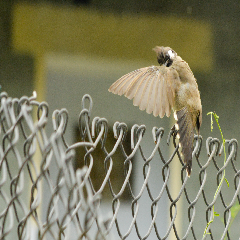

In [26]:
img

In [27]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img

array([[[[ 46.,  45.,  15.],
         [ 51.,  47.,  22.],
         [ 35.,  40.,  10.],
         ...,
         [ 58.,  60.,  46.],
         [ 57.,  59.,  38.],
         [ 52.,  57.,  34.]],

        [[ 44.,  47.,  18.],
         [ 49.,  47.,  24.],
         [ 46.,  49.,  20.],
         ...,
         [ 63.,  65.,  44.],
         [ 55.,  59.,  32.],
         [ 58.,  62.,  37.]],

        [[ 51.,  50.,  19.],
         [ 53.,  53.,  29.],
         [ 43.,  50.,  19.],
         ...,
         [ 58.,  60.,  46.],
         [ 52.,  56.,  29.],
         [ 60.,  64.,  37.]],

        ...,

        [[150., 145., 125.],
         [123., 120., 105.],
         [ 85.,  69.,  46.],
         ...,
         [155., 162., 144.],
         [154., 163., 144.],
         [173., 177., 176.]],

        [[140., 138., 123.],
         [103.,  87.,  74.],
         [ 68.,  63.,  44.],
         ...,
         [155., 164., 147.],
         [147., 156., 139.],
         [221., 214., 204.]],

        [[116., 105.,  85.],
       

In [28]:
np.argmax(model.predict(img))

1/1 [==============================] - 0s 20ms/step


7

In [29]:
bird_dict

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}